In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib as plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Neeraj\\acads\\INSOFE\\STUDY MATERIAL\\Original\\KAGGLE\\kc_house_data'

In [3]:
house = pd.read_csv('C:\\Neeraj\\acads\\INSOFE\\STUDY MATERIAL\\Original\\KAGGLE\\kc_house_data\\kc_house_data.csv', index_col = [0])
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.shape

(21613, 20)

#### Checking the missing values

In [5]:
house.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in the dataset. Hence, we need not perform `imputation`.

#### Checking the datatypes of the features


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.5+ MB


In [7]:
house.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [8]:
house['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

#### Separating the `categorical` and `numerical` features

In [9]:
cat_cols = ['bedrooms','bathrooms','floors','waterfront','view',
            'condition','grade','yr_built','yr_renovated']

In [10]:
house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
num_cols = ['price','sqft_living', 'sqft_lot','sqft_above','sqft_basement', 
            'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15']
del num_cols[0]

In [12]:
num_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

From the above `num_col` information, we can add few columns which are as following

In [13]:
house['totalSF'] = house['sqft_above'] + house['sqft_basement']
house['living_lot'] = house['sqft_living'] + house['sqft_lot']
house['living_lot15'] = house['sqft_living15'] + house['sqft_lot15']
append = ['totalSF', 'living_lot', 'living_lot15']
for i in append:
    num_cols.append(i)

In [14]:
num_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'totalSF',
 'living_lot',
 'living_lot15']

<div class="alert alert-block alert-info"><b> 

 - By adding new columns, there are chances that the features may posses *Multicollinearity*. We shall check this during the visualization section.

</b></div>

#### Checking the unique values in `categotical features`

In [15]:
for i in cat_cols:
    print(i,'-->', house[i].unique(),'\n')

bedrooms --> [ 3  2  4  5  1  6  7  0  8  9 11 10 33] 

bathrooms --> [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ] 

floors --> [1.  2.  1.5 3.  2.5 3.5] 

waterfront --> [0 1] 

view --> [0 3 4 2 1] 

condition --> [3 5 4 1 2] 

grade --> [ 7  6  8 11  9  5 10 12  4  3 13  1] 

yr_built --> [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935] 

yr_ren

### Separating the `independent variables` and the `dependent variable`

In [16]:
X = house.drop('price', axis = 1)
y = house['price']

### Train-Validation Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [18]:
X_train.shape

(15129, 22)

In [19]:
X_test.shape

(6484, 22)

# Visualization 

Checking the distribution of the target variable `price`

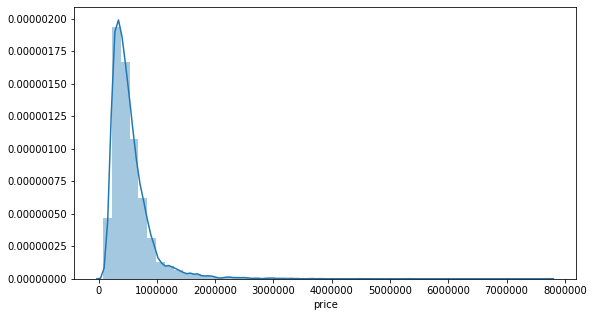

In [20]:
plt.figure(figsize = (9,5))

sns.distplot(y, bins = 50)

Our target variable `price` is heavily right skewed. This means that there are high number of houses which are priced less than `15,000,000`. 

Intuitively, there could be outliers, as seen in the plot, which we will confirm in the further visualization steps.

___

### Categorical Features

#### Checking the correlation between the `categorical features`

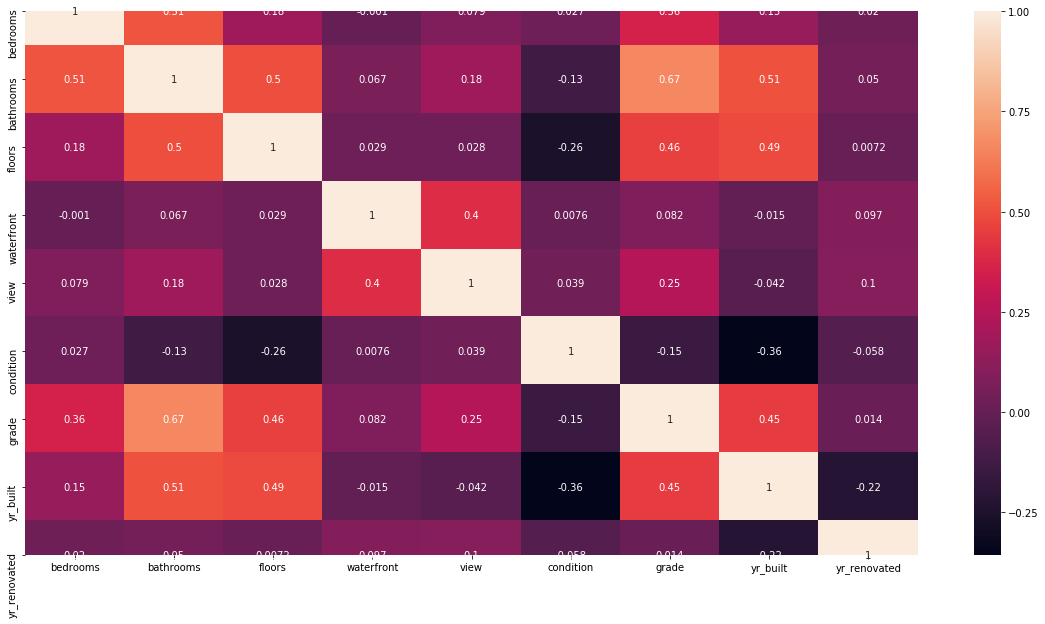

In [21]:
plt.figure(figsize = (20,10))

sns.heatmap(data = X_train[cat_cols].corr(), annot = True)

There is no problem of *multicollinearity* between the `catergorical variables`. Hence, we will retain all the catergorical variables.

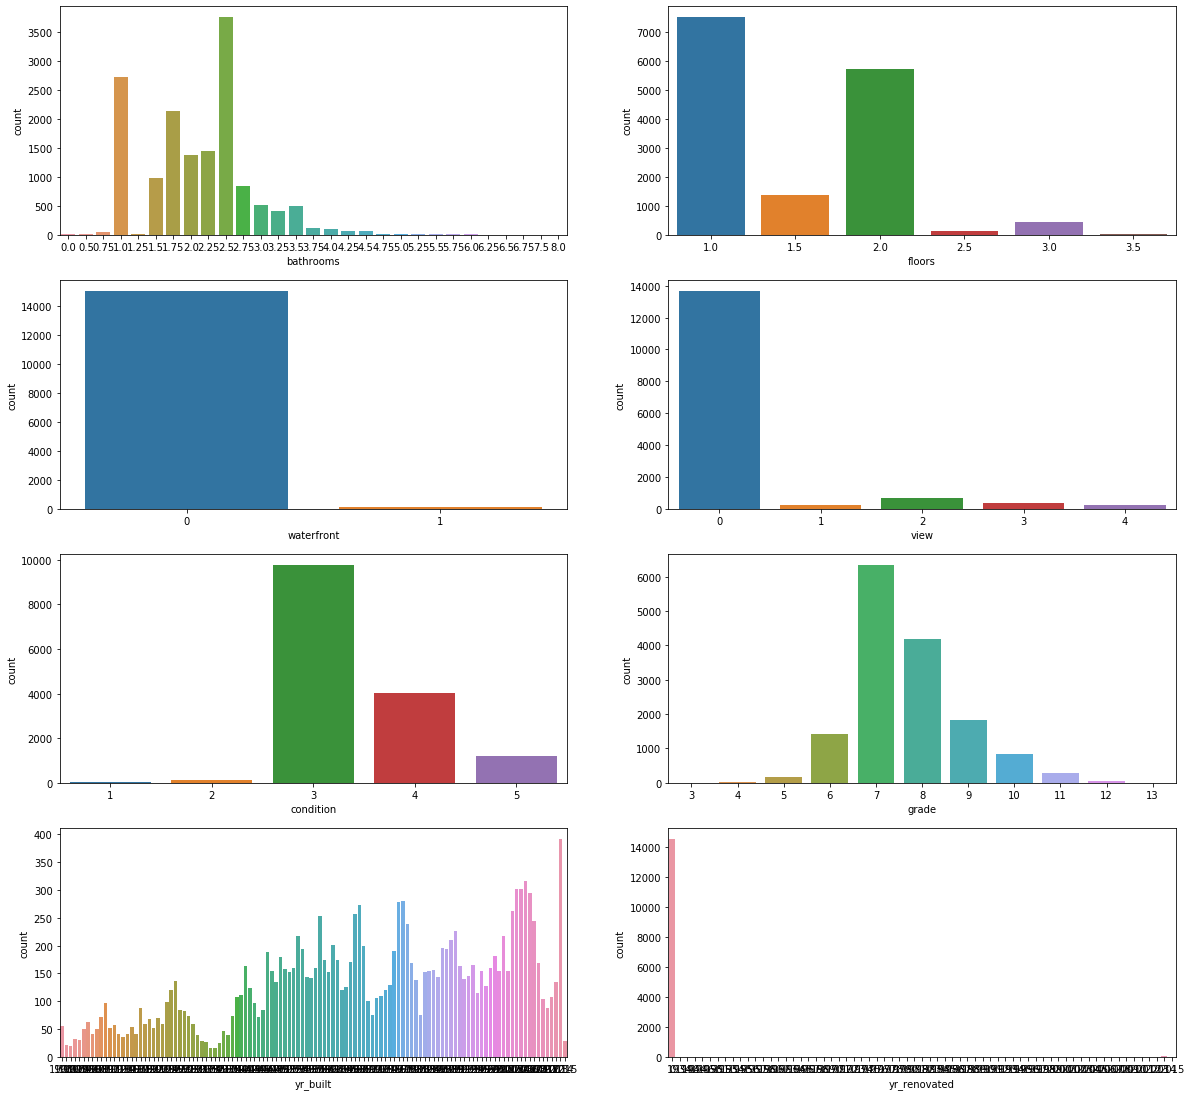

In [22]:
fig = plt.figure(figsize = (20,100))

for i in range(1, len(cat_cols)):
    ax = fig.add_subplot(20, 2, i)
    g = sns.countplot(X_train[cat_cols[i]], data = X_train)
    

In [23]:
result = []
feature = []
for i in X_train[cat_cols].columns:
    count = X_train[i].value_counts()/len(X_train[i])*100
    count = count[count>=85]
    if not count.empty :
        result.append([i,count.to_string(header=None, index=None)])
        feature.append(i)

final_cat = pd.DataFrame(result, columns = ['Feature', 'Percentage of features'])
final_cat

,Feature,Percentage of features
0,waterfront,99.286139
1,view,90.263732
2,yr_renovated,95.92174


We can see that `waterfront`, `view` and `yr_renovated` feaures either have zero variance or 1 very dominant category.

Hence we would drop these features in the further steps

In [24]:
zerovar_cat_col = ['waterfront','view','yr_renovated']

In [25]:
X_train[cat_cols].astype('category').describe()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated
count,15129,15129.0,15129.0,15129,15129,15129,15129,15129,15129
unique,13,29.0,6.0,2,5,5,11,116,67
top,3,2.5,1.0,0,0,3,7,2014,0
freq,6828,3754.0,7512.0,15021,13656,9753,6336,391,14512


___

### Numerical Features

#### Checking the correlation between the numerical variables

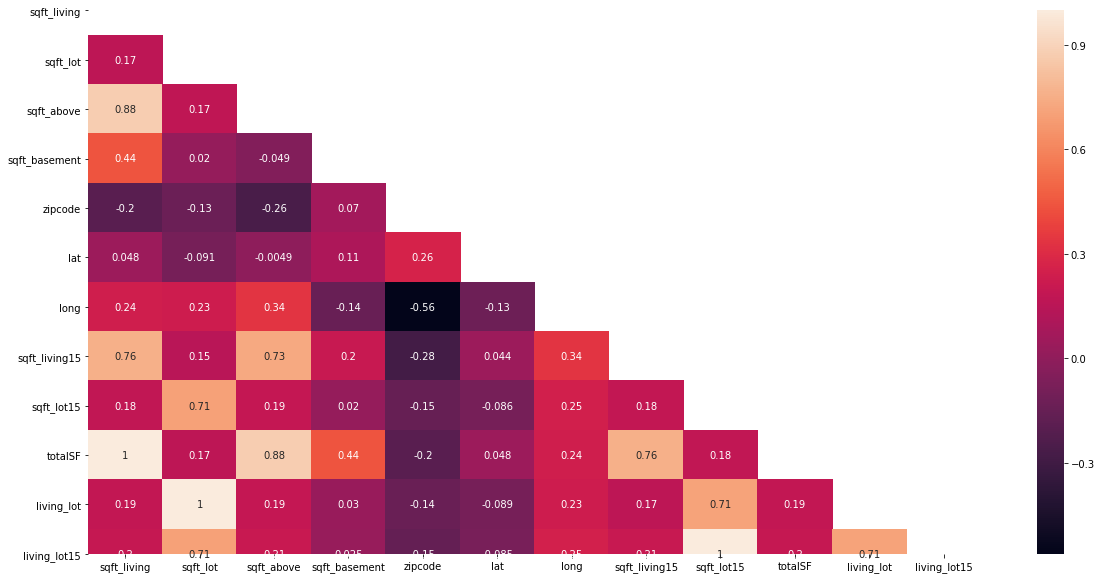

In [26]:
plt.figure(figsize = (20,10))
matrix = np.triu(X_train[num_cols].corr())
sns.heatmap(data = X_train[num_cols].corr(), annot = True, mask = matrix)

As we had assumed, after adding few numerical features, we can see there is a problem of *multicollinearity*. 

Hence, we would drop the modified features in the further steps.

In [27]:
m_cols = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']

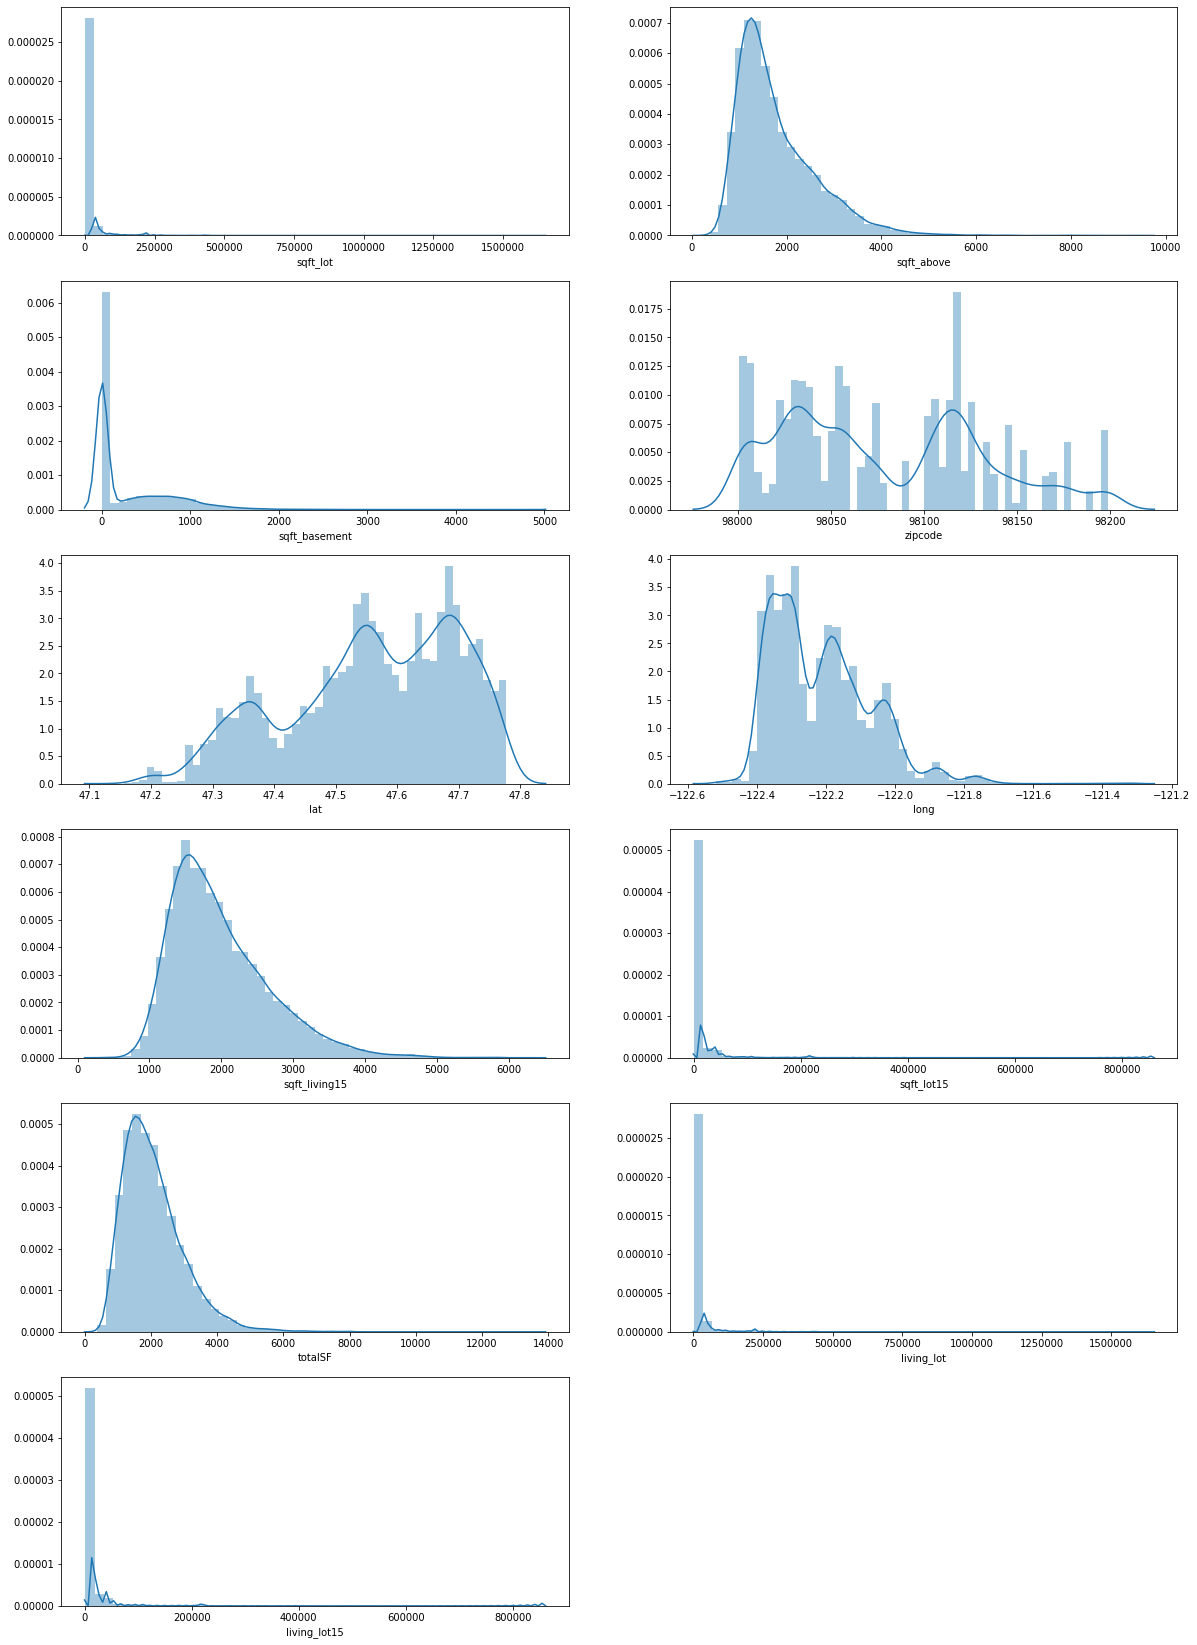

In [28]:
fig = plt.figure(figsize = (20,100))

for i in range(1, len(num_cols)):
    ax = fig.add_subplot(20, 2, i)
    g = sns.distplot(X_train[num_cols[i]], bins = 50)
    

In [29]:
result = []

for i in X_train[num_cols].columns:
    count = X_train[i].value_counts()/len(X_train[i])*100
    count = count[count>=85]
    if not count.empty :
        result.append([i,count.to_string(header=None, index=None)])
        feature.append(i)

final_num = pd.DataFrame(result, columns = ['Feature', 'Percentage of features'])
final_num

,Feature,Percentage of features


As we see above, no features have variance greater than 85%. Hence we will retain all the numerical features.


<div class="alert alert-block alert-info"><b> 

 - There are few numerical features which have multicollinearity which would be dropped further.

</b></div>

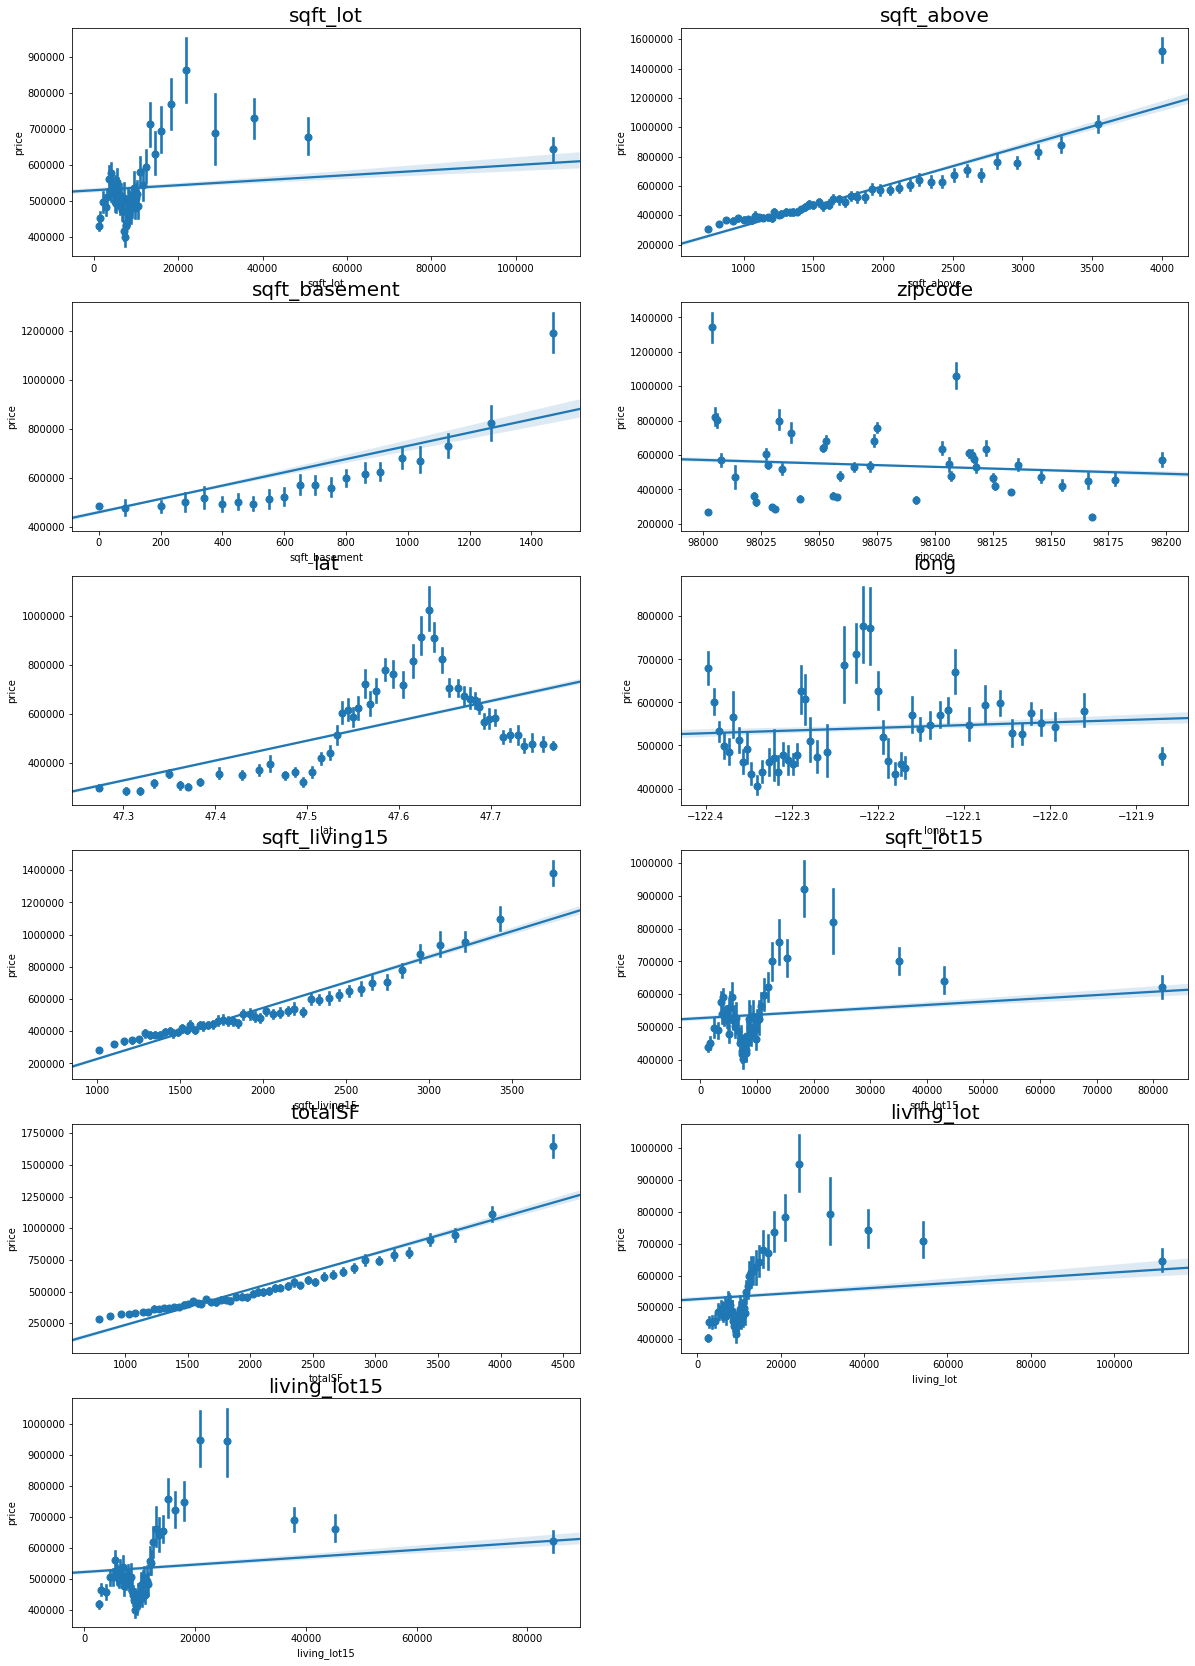

In [30]:
fig = plt.figure(figsize = (20,100))

for i in range(1, len(num_cols)):
    ax = fig.add_subplot(20, 2, i)
    g = sns.regplot(x = X_train[num_cols[i]], y = y_train, x_bins = 50)
    plt.title(num_cols[i], fontsize = 20)
#     house_train[num_cols[i]], y = house_train['SalePrice'])
    

In the above plots, we can see that in `living_lot15`, there are few points with higher area (square feet) but lower subsequent price. Hence, we would only include those points which have area greater than `40,000`

print('Number of observations above 400000 = ', X_train[X_train['living_lot15'] > 400000].shape[0])
X_train = X_train[X_train['living_lot15'] < 400000]
X_train = X_train[X_train['living_lot15'] < 400000]

X_train['living_lot15'].count()

### Function to drop the features

In [31]:
dropped_features = []

def update_cols(col_list):
        
    print('Before Drop : \n# of Numeric Features : ', len(num_cols), 
          '\n# of Categorical Features : ', len(cat_cols),
          '\n# of Total Features : ', len(num_cols) + len(cat_cols))

    X_train.drop(col_list, axis = 1, inplace = True)
    X_test.drop(col_list, axis = 1, inplace = True)
    dropped_features.append(col_list)

    for col in col_list :
        if col in num_cols :
            num_cols.remove(col)
        elif col in cat_cols :
            cat_cols.remove(col)

    print('\nAfter Drop : \n# of Numeric Features : ', len(num_cols), 
          '\n# of Categorical Features : ', len(cat_cols),
          '\n# of Total Features : ', len(num_cols) + len(cat_cols))

In [32]:
update_cols(zerovar_cat_col)

Before Drop : 
# of Numeric Features :  12 
# of Categorical Features :  9 
# of Total Features :  21

After Drop : 
# of Numeric Features :  12 
# of Categorical Features :  6 
# of Total Features :  18


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
update_cols(m_cols)

Before Drop : 
# of Numeric Features :  12 
# of Categorical Features :  6 
# of Total Features :  18

After Drop : 
# of Numeric Features :  6 
# of Categorical Features :  6 
# of Total Features :  12


___

One last step before building the models.

Before proceeding:
 - We need to __Dummify__ the categorical features, using **OneHot Enconding**
 - **Standardize** the numerical features

### One Hot Encoding the `catergorical features`

In [34]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

X_train = ohe.fit_transform(X_train[cat_cols])
X_test = ohe.transform(X_test[cat_cols])

### Standardization of the `numerical features`

In [35]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler(with_mean = False)

X_train_SC = SC.fit_transform(X_train)
X_test_SC = SC.transform(X_test)

<div class="alert alert-block alert-info"><b> 

 - StandardScaler does not work with sparse matrix and tends to raise an error. Hence, the parameter "with_mean = False" has been included

</b></div>

We have cleaned the data and now ready to build different models.

___

# Model Building

Since our target variable has a continuous value, we will be implementing **Regression Techniques**.

The models that we shall be implementing are:
 - Linear Regression
 - Elastic Net
 - KNN Regression
 - Decision Tree Regression
 
 - Random Forest Regressor
 - AdaBoost Regressor
 - Gradient Boost Regressor
 - XGBoost Regressor

In [36]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

model_report_SC = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'GaussianNB']
models=[SVC(kernel='linear'),SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), GaussianNB()]
for i in models:
    model = i
    model.fit(X_train_SC,y_train)
    prediction=model.predict(X_test_SC)
    model_report_SC.append(accuracy_score(prediction,y_test))
models_dataframe_SC=pd.DataFrame(model_report_SC,index=classifiers)   
models_dataframe_SC.columns=['Accuracy_SC']
models_dataframe_SC

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [59]:
model_report = []
mse = []
mae = []
classifiers=['Linear Regression','Elastic Net','DT Regression','KNN Regression']
models = [LinearRegression(), ElasticNet(),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=3)]
for i in models:
    model = i
    fit = model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    mse.append(mean_squared_error(y_pred = prediction, y_true = y_test))
    mae.append(mean_absolute_error(y_pred = prediction, y_true = y_test))

mse_df=pd.DataFrame(mse,index=classifiers)  
mse_df.columns = ['MSE']
mae_df=pd.DataFrame(mae,index=classifiers)
mae_df.columns = ['MAE']
models_dataframe = pd.DataFrame.join(self = mse_df, other = mae_df, how = 'left')
models_dataframe.columns=['MSE', 'MAE']
models_dataframe['RMSE'] = models_dataframe['MSE'].apply(lambda x: x**(1/2))
models_dataframe

,MSE,MAE,RMSE
Linear Regression,5.074161e+10,139250.732067,2.537081e+10
Elastic Net,1.054703e+11,199875.560551,5.273513e+10
DT Regression,7.776709e+10,167799.661943,3.888355e+10
KNN Regression,6.803665e+10,162015.347882,3.401832e+10


In [61]:
slr = LinearRegression()
slr.fit(X_train, y_train)
pred_train_slr = slr.predict(X_train)
pred_test_slr = slr.predict(X_test)
LRMSE = mean_squared_error(y_true = y_test, y_pred = pred_test_slr)
LRMAE = mean_absolute_error(y_true = y_test, y_pred = pred_test_slr)
LRScores = [LRMSE, LRMAE]


en = ElasticNet()
en.fit(X_train, y_train)
pred_train_en = en.predict(X_train)
pred_test_en = en.predict(X_test)
ENMSE = mean_squared_error(y_true = y_test, y_pred = pred_test_en)
ENMAE = mean_absolute_error(y_true = y_test, y_pred = pred_test_en)
ENScores = [ENMSE, ENMAE]

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred_train_dtr = dtr.predict(X_train)
pred_test_dtr = dtr.predict(X_test)
DTRMSE = mean_squared_error(y_true = y_test, y_pred = pred_test_dtr)
DTRMAE = mean_absolute_error(y_true = y_test, y_pred = pred_test_dtr)
DTRScores = [DTRMSE, DTRMAE]


knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
pred_train_knr = knr.predict(X_train)
pred_test_knr = knr.predict(X_test)
KNRMSE = mean_squared_error(y_true = y_test, y_pred = pred_test_knr)
KNRMAE = mean_absolute_error(y_true = y_test, y_pred = pred_test_knr)
KNRScores = [KNRMSE, KNRMAE]

In [62]:
non_std_model = pd.DataFrame([LRScores, ENScores,DTRScores, KNRScores], columns = ['MSE', 'MAE'], 
                             index = ['Linear', 'Elastic Net', 'DTR','KNR'])
non_std_model['RMSE'] = non_std_model['MSE'].apply(lambda x: x**(1/2))
non_std_model

,MSE,MAE,RMSE
Linear,5.074161e+10,139250.732067,2.537081e+10
Elastic Net,1.054703e+11,199875.560551,5.273513e+10
DTR,7.688370e+10,166936.376034,3.844185e+10
KNR,6.651286e+10,154976.340315,3.325643e+10
